# Ordinary Least Squares

### Importing the Data

In [1]:
import numpy as np
import pandas as pd

from notebooks.helpers import import_data

data = import_data()

### Defining the Response and the Predictors

In [2]:
temp = data.copy()
y = temp['AUC']
X = temp.drop(['AUC'], axis=1)

### Encoding the Data

In [3]:
from category_encoders import TargetEncoder

X.applymap(lambda x : x.strip() if isinstance(x, str) else x)
X['Pgp'].replace(['no', 'yes'], [0, 1], inplace=True)
X['Position'].replace(['core', 'matrix'], [0, 1], inplace=True)
X['Route'].replace(['IV', 'IN'], [0, 1], inplace=True)
enc = TargetEncoder(cols=['Comp1', 'Comp2'])
X = enc.fit_transform(X, y)

### Fitting the Model

In [4]:
import statsmodels.api as sm

X = sm.add_constant(X, prepend=False)
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AUC   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     7.210
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           8.56e-10
Time:                        03:15:22   Log-Likelihood:                -168.66
No. Observations:                 133   AIC:                             363.3
Df Residuals:                     120   BIC:                             400.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Weight               0.0008      0.001      0.875      0.384      -0.001       0.003
logP                -0.0223      0.076     -0.292      0.771      -0.174       0.129
Solubility           0.6510      0.460      1.415      0.160      -0.260       1.562
Pgp                  0.0011      0.180      0.006      0.995      -0.355       0.357
DrugCarrierRatio     0.0547      0.247      0.222      0.825      -0.434       0.543
Position            -0.0724      0.238     -0.304      0.761      -0.543       0.399
Comp1                0.7167      1.023      0.701      0.485      -1.309       2.742
Comp2                2.1964      0.738      2.976      0.004       0.735       3.658
Size                 0.0008      0.001      0.659      0.511      -0.002       0.003
Zeta                -0.0008      0.004     -0.180      0.857      -0.009       0.008
Release             -0.0004      0.016     -0.026      0.980      -0.032       0.032
Route                1.2499      0.169      7.406      0.000       0.916       1.584
const               -3.1884      1.648     -1.935      0.055      -6.451       0.074
==============================================================================
Omnibus:                       32.163   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.015
Skew:                           1.124   Prob(JB):                     1.13e-12
Kurtosis:                       5.209   Cond. No.                     8.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting Some Diagnostic Plots


Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 29.1373957980798), ('p-value', 0.003759028111605618), ('f-value', 2.8053788966655926), ('f p-value', 0.0020597522010938254)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', 0.1970154390441005), ('p-value', 0.9999999922943528)]

Linearity test (Harvey-Collier):
 Failed


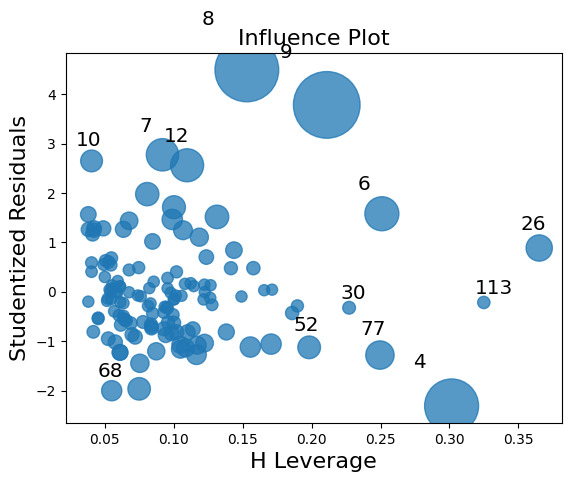

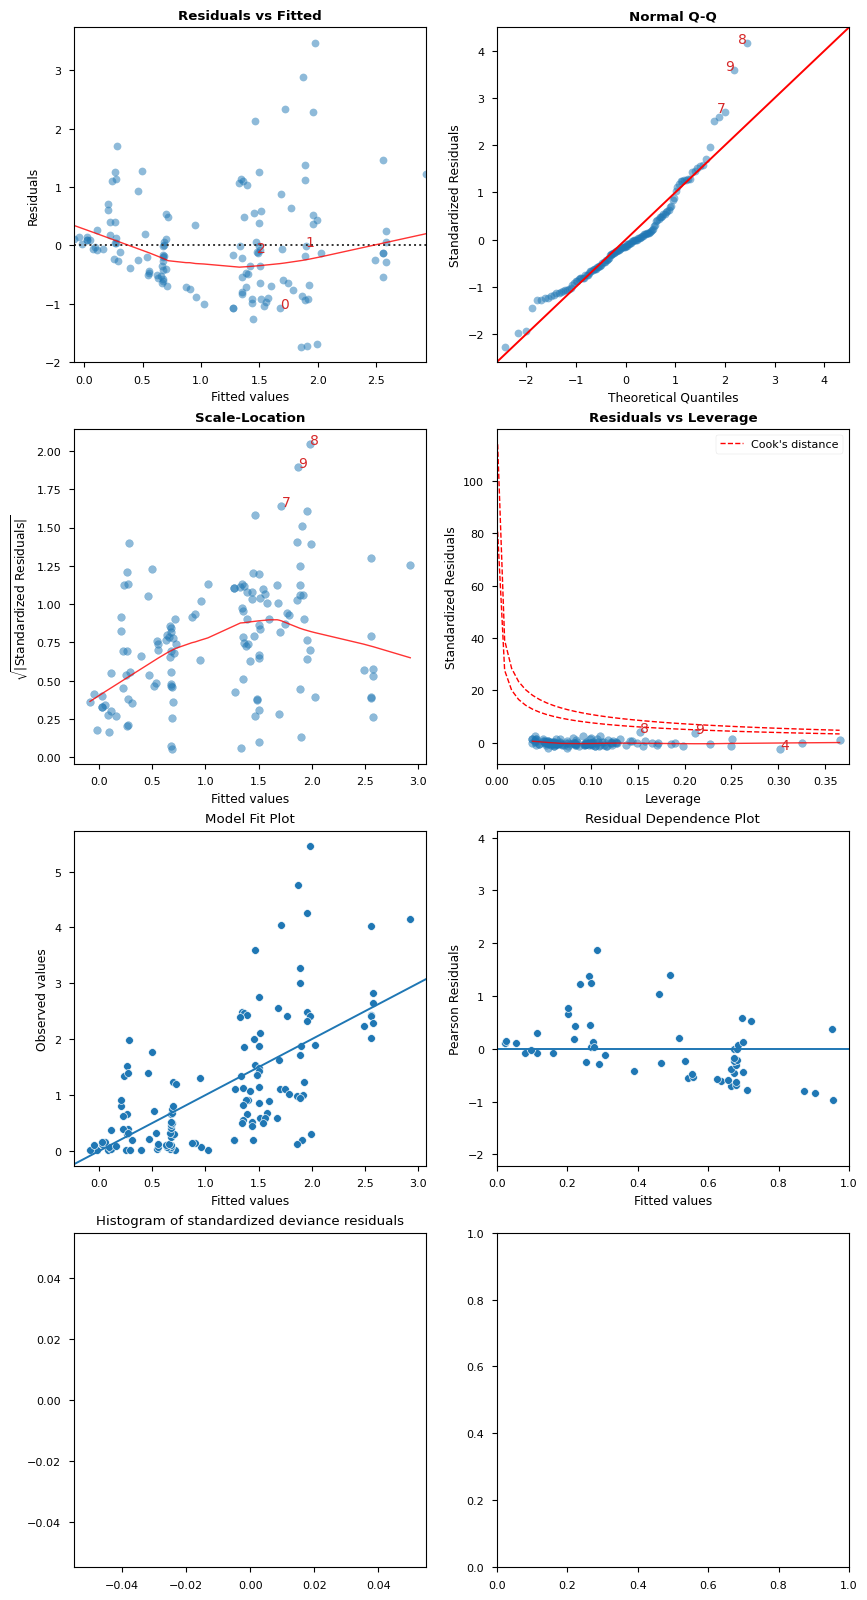

            Features  VIF Factor
8               Size        1.14
11             Route        1.15
0             Weight        1.15
4   DrugCarrierRatio        1.16
3                Pgp        1.31
5           Position        1.31
10           Release        1.44
1               logP        1.44
7              Comp2        1.53
6              Comp1        1.63
2         Solubility        1.66
9               Zeta        1.85
12             const      440.60
None


(<Figure size 1000x2000 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Model Fit Plot'}, xlabel='Fitted values', ylabel='Observed values'>,
         <AxesSubplot: title={'center': 'Residual Dependence Plot'}, xlabel='Fitted values', ylabel='Pearson Residuals'>],
        [<AxesSubplot: title={'center': 'Histogram of standardized deviance residuals'}>,
         <AxesSubplot: >]], dtype=object))

In [5]:
from notebooks.helpers import LinearRegDiagnostic

cls = LinearRegDiagnostic(ols)
cls()

### Transforming the Response

In [6]:
from scipy import stats

t_y, l = stats.boxcox(y)

### Refitting the Model

In [7]:
t_ols = sm.OLS(t_y, X).fit()
t_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     10.14
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.65e-13
Time:                        03:15:23   Log-Likelihood:                -160.83
No. Observations:                 133   AIC:                             347.7
Df Residuals:                     120   BIC:                             385.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Weight            8.189e-05      0.001      0.096      0.924      -0.002       0.002
logP                -0.0095      0.072     -0.132      0.895      -0.152       0.133
Solubility           0.3306      0.434      0.762      0.447      -0.528       1.189
Pgp                  0.0502      0.170      0.296      0.768      -0.286       0.386
DrugCarrierRatio     0.1223      0.233      0.526      0.600      -0.338       0.583
Position            -0.2397      0.224     -1.069      0.287      -0.684       0.204
Comp1               -0.1897      0.965     -0.197      0.844      -2.100       1.720
Comp2                1.2645      0.696      1.817      0.072      -0.113       2.642
Size                 0.0011      0.001      0.956      0.341      -0.001       0.003
Zeta                 0.0010      0.004      0.247      0.806      -0.007       0.009
Release             -0.0367      0.015     -2.410      0.017      -0.067      -0.007
Route                1.3943      0.159      8.763      0.000       1.079       1.709
const               -2.2361      1.554     -1.439      0.153      -5.312       0.840
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.210
Skew:                           0.067   Prob(JB):                        0.900
Kurtosis:                       2.860   Cond. No.                     8.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting Some Diagnostic Plots


Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 18.951149685795112), ('p-value', 0.08971418681334192), ('f-value', 1.6616695068459384), ('f p-value', 0.08385482111502729)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', 1.628087172795382), ('p-value', 0.03803933403758008)]

Linearity test (Harvey-Collier):
 Failed


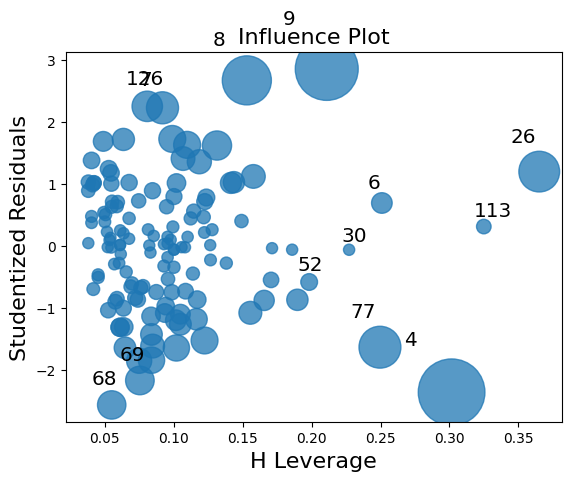

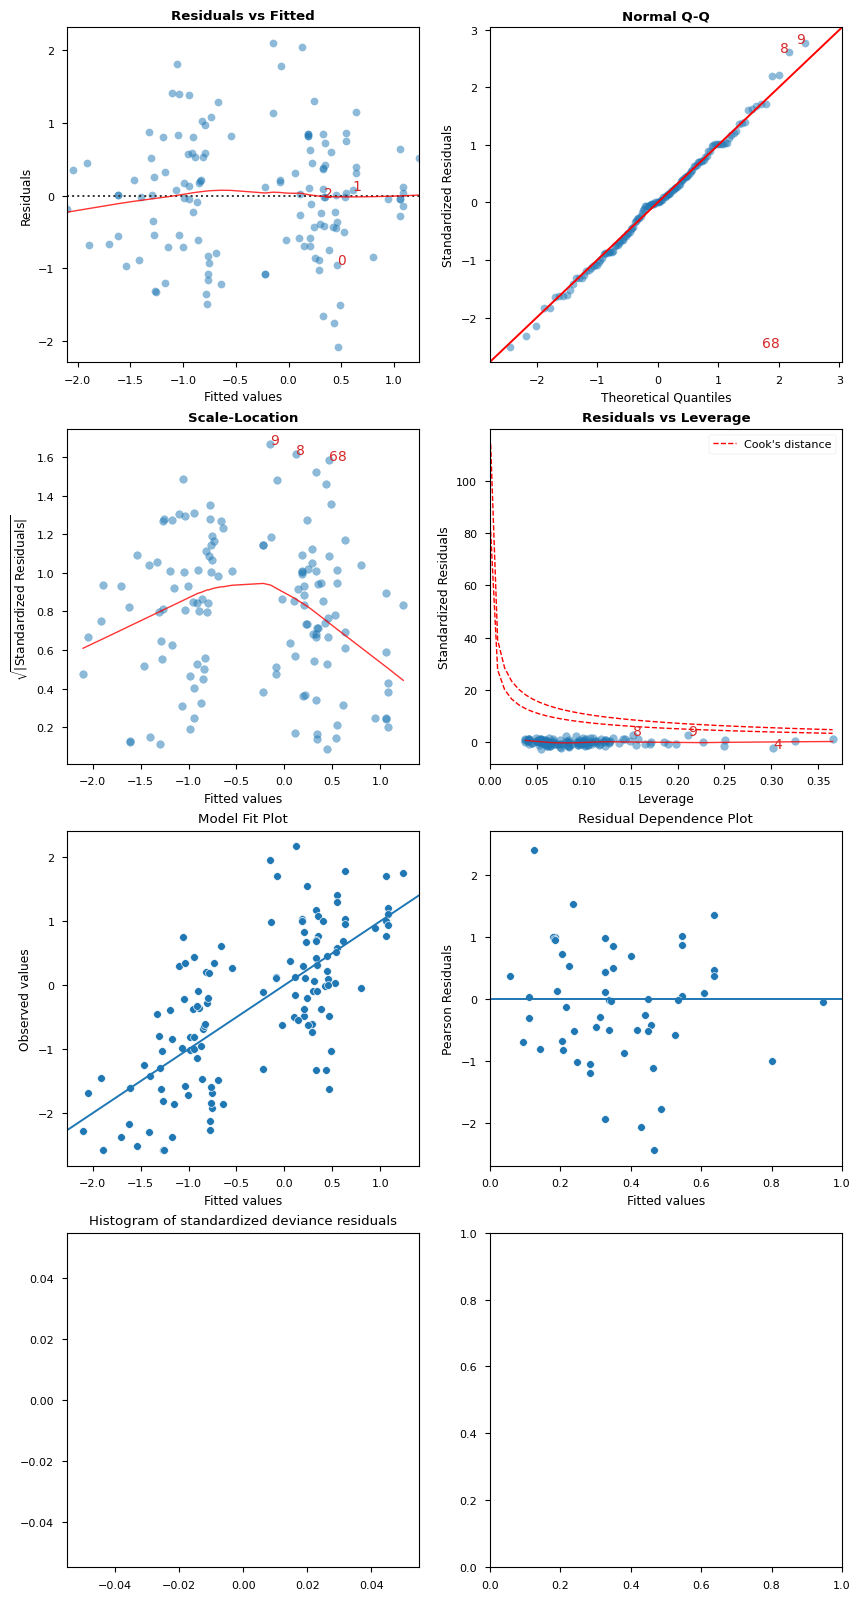

            Features  VIF Factor
8               Size        1.14
11             Route        1.15
0             Weight        1.15
4   DrugCarrierRatio        1.16
3                Pgp        1.31
5           Position        1.31
10           Release        1.44
1               logP        1.44
7              Comp2        1.53
6              Comp1        1.63
2         Solubility        1.66
9               Zeta        1.85
12             const      440.60
None


(<Figure size 1000x2000 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Model Fit Plot'}, xlabel='Fitted values', ylabel='Observed values'>,
         <AxesSubplot: title={'center': 'Residual Dependence Plot'}, xlabel='Fitted values', ylabel='Pearson Residuals'>],
        [<AxesSubplot: title={'center': 'Histogram of standardized deviance residuals'}>,
         <AxesSubplot: >]], dtype=object))

In [8]:
cls = LinearRegDiagnostic(t_ols)
cls()

### Refitting the Model with Interactions

In [9]:
data1 = X.copy()
data1['AUC'] = t_y
t_inter_ols = sm.OLS.from_formula(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data1
).fit()
t_inter_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AUC   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     5.950
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           8.00e-11
Time:                        03:15:23   Log-Likelihood:                -57.020
No. Observations:                 133   AIC:                             272.0
Df Residuals:                      54   BIC:                             500.4
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -56.3895     38.685     -1.458      0.151    -133.948      21.169
Weight                          0.0962      0.031      3.068      0.003       0.033       0.159
logP                           -1.1455      3.728     -0.307      0.760      -8.620       6.329
Solubility                      1.4863     32.526      0.046      0.964     -63.724      66.697
Pgp                            -0.3661      5.657     -0.065      0.949     -11.707      10.975
DrugCarrierRatio                2.6353      8.391      0.314      0.755     -14.187      19.458
Position                      -12.7200      8.415     -1.512      0.136     -29.592       4.152
Comp1                          47.6133     29.876      1.594      0.117     -12.284     107.511
Comp2                          25.7243     33.628      0.765      0.448     -41.695      93.144
Size                           -0.0032      0.031     -0.105      0.917      -0.065       0.059
Zeta                           -0.0490      0.157     -0.312      0.757      -0.364       0.266
Release                         0.3283      0.541      0.607      0.547      -0.757       1.413
Route                          -2.3630      4.855     -0.487      0.628     -12.097       7.371
Weight:logP                    -0.0020      0.002     -1.023      0.311      -0.006       0.002
Weight:Solubility              -0.0152      0.020     -0.766      0.447      -0.055       0.025
Weight:Pgp                     -0.0008      0.003     -0.256      0.799      -0.007       0.006
Weight:DrugCarrierRatio         0.0051      0.009      0.598      0.552      -0.012       0.022
Weight:Position                -0.0070      0.010     -0.692      0.492      -0.027       0.013
Weight:Comp1                   -0.0732      0.020     -3.578      0.001      -0.114      -0.032
Weight:Comp2                    0.0089      0.019      0.476      0.636      -0.028       0.046
Weight:Size                 -3.251e-05   2.34e-05     -1.387      0.171   -7.95e-05    1.45e-05
Weight:Zeta                     0.0002   8.16e-05      2.253      0.028    2.02e-05       0.000
Weight:Release                 -0.0011      0.001     -2.034      0.047      -0.002   -1.56e-05
Weight:Route                    0.0027      0.003      0.879      0.383      -0.003       0.009
logP:Solubility                -0.6621      0.656     -1.010      0.317      -1.977       0.653
logP:Pgp                       -0.2041      0.384     -0.531      0.598      -0.975       0.567
logP:DrugCarrierRatio           0.1049      0.444      0.236      0.814      -0.786       0.996
logP:Position                  -0.5884      0.709     -0.830      0.410      -2.010       0.833
logP:Comp1                      1.6556      2.113      0.784      0.437      -2.580       5.892
logP:Comp2 

In [10]:
t_inter_ols.pvalues[t_inter_ols.pvalues < 0.05]

Weight                0.003366
Weight:Comp1          0.000741
Weight:Zeta           0.028367
Weight:Release        0.046863
logP:Size             0.001497
logP:Release          0.010142
Solubility:Size       0.031482
Solubility:Release    0.008120
Release:Route         0.004926
dtype: float64

In [11]:
t_inter_ols.params[t_inter_ols.pvalues < 0.05]

Weight                0.096227
Weight:Comp1         -0.073196
Weight:Zeta           0.000184
Weight:Release       -0.001085
logP:Size             0.007103
logP:Release          0.093324
Solubility:Size       0.059483
Solubility:Release    0.976344
Release:Route         0.112227
dtype: float64

In [12]:
t_inter_ols.mse_resid

0.33991457892540355

In [13]:
# AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2
from helpers import predict, radar_graph

pred = predict(t_inter_ols)
pred

0   -0.180600
1    0.202273
2   -0.637598
3   -1.391869
dtype: float64

In [14]:
true = stats.boxcox([1.03, 2.96, 0.365, 0.614], lmbda=l)
true

array([ 0.02968194,  1.26889838, -0.87767168, -0.45579988])

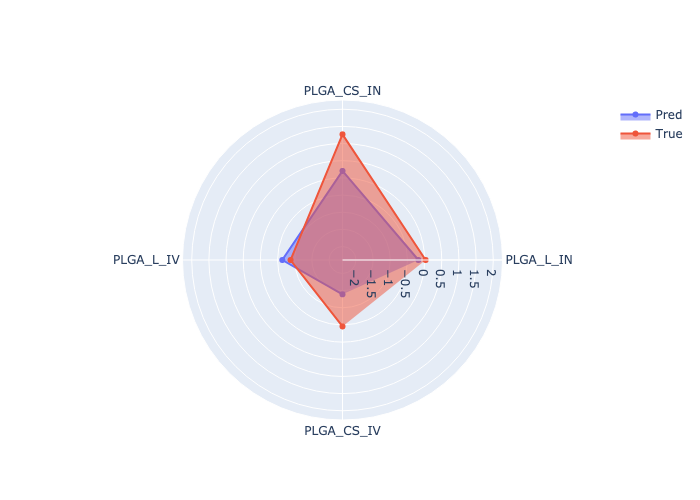

In [15]:
radar_graph(true, pred)

In [16]:
X[50:60]

,Weight,logP,Solubility,Pgp,DrugCarrierRatio,Position,Comp1,Comp2,Size,Zeta,Release,Route,const
50,244.261,4.42,0.025,0,0.111,0,1.239028,1.004409,154.00,-33.65,0.294118,1,1.0
51,252.268,2.26,0.071,1,0.480,0,1.239028,1.116500,170.63,-37.70,2.258333,1,1.0
52,221.339,3.47,0.780,1,0.500,1,1.350447,1.004409,201.20,49.30,2.666667,1,1.0
53,252.268,2.26,0.071,1,0.480,0,1.239028,1.106221,400.00,33.40,2.945833,1,1.0
54,375.864,3.70,0.004,1,0.500,0,1.094142,1.004409,115.10,-16.70,3.600000,1,1.0
55,375.140,3.70,0.004,1,0.100,0,1.094142,1.004409,121.46,-18.25,1.458333,1,1.0
56,469.550,2.04,0.121,0,0.100,0,1.094142,1.004409,158.10,-24.50,18.000000,1,1.0
57,410.212,3.27,0.171,1,0.100,1,1.094142,1.004409,174.90,-23.30,4.166667,1,1.0
58,222.239,3.54,0.008,0,1.000,0,1.078446,1.004409,162.10,-38.50,6.250000,1,1.0
59,244.261,4.42,0.025,0,0.111,0,1.094142,1.116500,176.60,-30.85,3.750000,1,1.0



Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 89.45666794335965), ('p-value', 0.17653858389818228), ('f-value', 1.4222967425837658), ('f p-value', 0.0855980421221143)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', nan), ('p-value', nan)]

Linearity test (Harvey-Collier):
 Failed


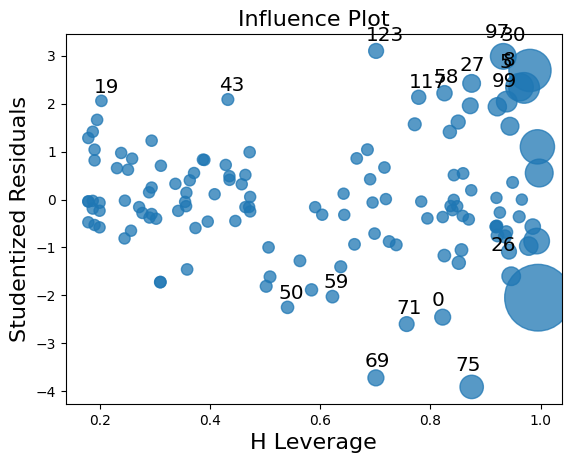

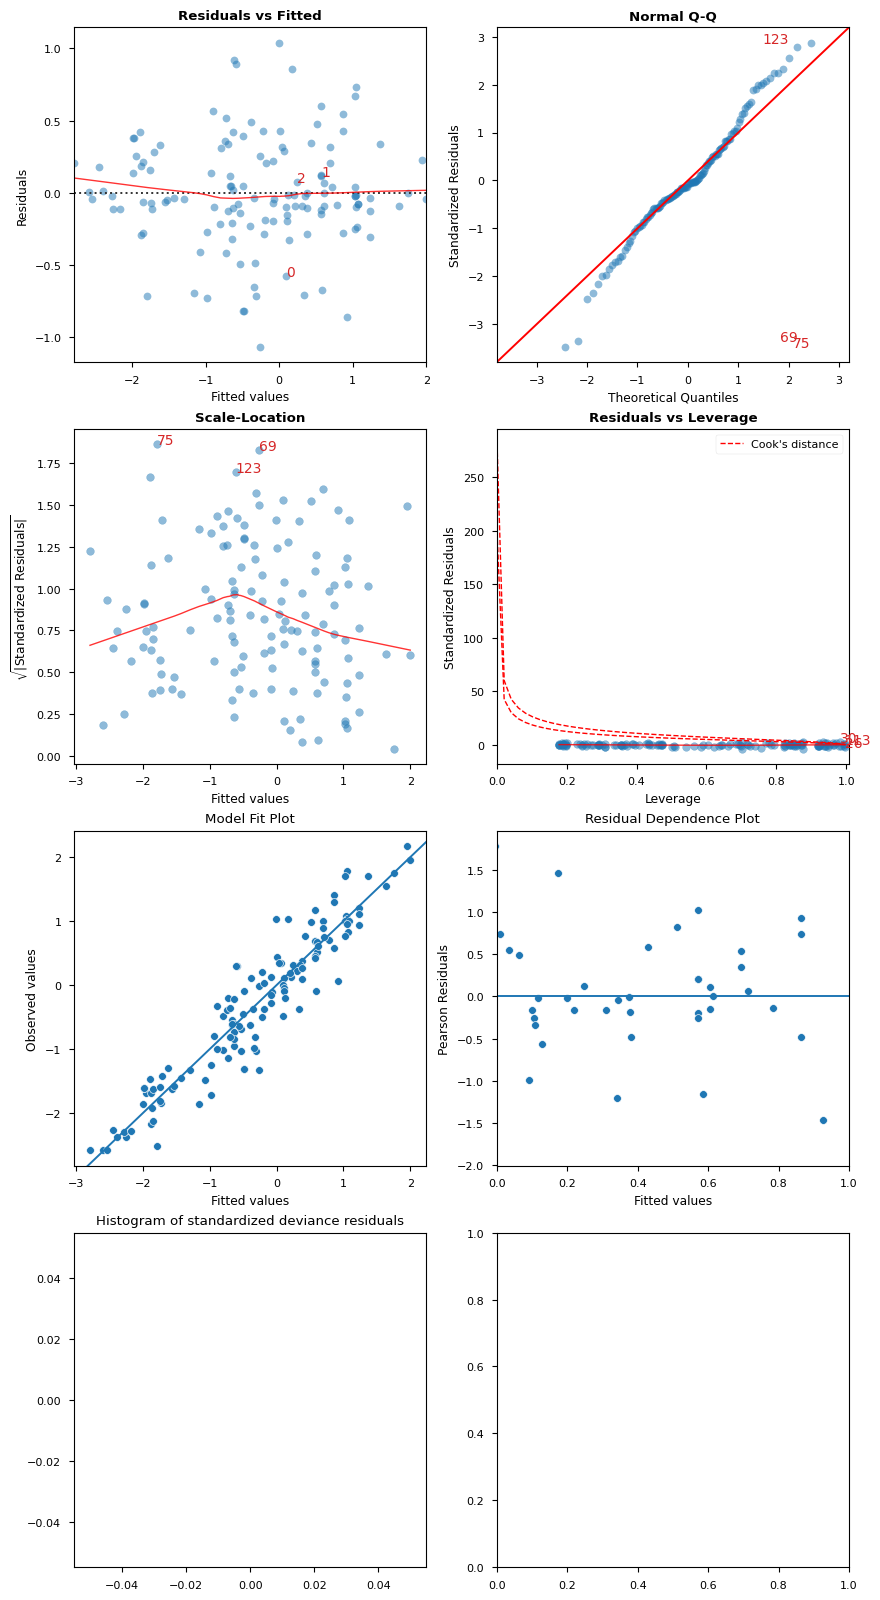

                     Features  VIF Factor
51  DrugCarrierRatio:Position        0.46
78              Release:Route        9.59
76               Zeta:Release       10.17
42           Solubility:Route       14.31
50                  Pgp:Route       15.62
..                        ...         ...
2                        logP     8274.95
37           Solubility:Comp1     8387.00
64                Comp1:Comp2    11608.44
3                  Solubility    20036.46
0                   Intercept   585553.22

[79 rows x 2 columns]
None


(<Figure size 1000x2000 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Model Fit Plot'}, xlabel='Fitted values', ylabel='Observed values'>,
         <AxesSubplot: title={'center': 'Residual Dependence Plot'}, xlabel='Fitted values', ylabel='Pearson Residuals'>],
        [<AxesSubplot: title={'center': 'Histogram of standardized deviance residuals'}>,
         <AxesSubplot: >]], dtype=object))

In [17]:
cls = LinearRegDiagnostic(t_inter_ols)
cls()

### Fitting the Model w/ Interactions w/o y Transformation

In [18]:
data2 = X.copy()
data2['AUC'] = y
inter_ols = sm.OLS.from_formula(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data2
).fit()
inter_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AUC   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     3.899
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           2.49e-07
Time:                        03:15:26   Log-Likelihood:                -78.949
No. Observations:                 133   AIC:                             315.9
Df Residuals:                      54   BIC:                             544.2
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -27.5449     45.619     -0.604      0.549    -119.006      63.916
Weight                          0.1018      0.037      2.753      0.008       0.028       0.176
logP                           -4.9224      4.396     -1.120      0.268     -13.736       3.892
Solubility                    -33.1232     38.356     -0.864      0.392    -110.023      43.776
Pgp                            -1.8873      6.671     -0.283      0.778     -15.262      11.487
DrugCarrierRatio                3.2271      9.895      0.326      0.746     -16.610      23.065
Position                       -9.7077      9.924     -0.978      0.332     -29.604      10.188
Comp1                          24.6169     35.231      0.699      0.488     -46.017      95.251
Comp2                          12.6094     39.655      0.318      0.752     -66.895      92.114
Size                            0.0160      0.036      0.440      0.662      -0.057       0.089
Zeta                            0.1133      0.186      0.611      0.544      -0.259       0.485
Release                        -0.0025      0.638     -0.004      0.997      -1.282       1.277
Route                          -5.1097      5.725     -0.892      0.376     -16.588       6.369
Weight:logP                    -0.0017      0.002     -0.754      0.454      -0.006       0.003
Weight:Solubility              -0.0133      0.023     -0.569      0.572      -0.060       0.034
Weight:Pgp                     -0.0009      0.004     -0.231      0.818      -0.009       0.007
Weight:DrugCarrierRatio         0.0044      0.010      0.437      0.664      -0.016       0.025
Weight:Position                -0.0136      0.012     -1.144      0.258      -0.038       0.010
Weight:Comp1                   -0.0619      0.024     -2.566      0.013      -0.110      -0.014
Weight:Comp2                   -0.0061      0.022     -0.276      0.784      -0.050       0.038
Weight:Size                 -3.354e-05   2.77e-05     -1.213      0.230    -8.9e-05    2.19e-05
Weight:Zeta                     0.0002   9.62e-05      2.407      0.020    3.87e-05       0.000
Weight:Release                 -0.0009      0.001     -1.486      0.143      -0.002       0.000
Weight:Route                   -0.0010      0.004     -0.269      0.789      -0.008       0.006
logP:Solubility                -0.6584      0.773     -0.851      0.398      -2.209       0.892
logP:Pgp                        0.1451      0.453      0.320      0.750      -0.764       1.054
logP:DrugCarrierRatio           0.2196      0.524      0.419      0.677      -0.831       1.270
logP:Position                  -0.2686      0.836     -0.321      0.749      -1.945       1.408
logP:Comp1                      3.5399      2.492      1.421      0.161      -1.455       8.535
logP:Comp2 

In [19]:
true = [1.03, 2.96, 0.365, 0.614]

In [20]:
pred = predict(inter_ols)
pred

0    1.170683
1    1.254124
2    0.373611
3   -0.342816
dtype: float64

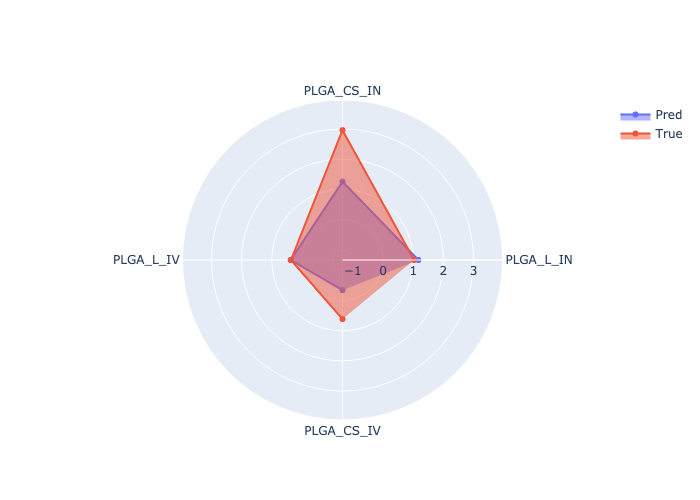

In [21]:
radar_graph(true, pred)


Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 61.67665129530662), ('p-value', 0.9125675328847032), ('f-value', 0.5986709948843185), ('f p-value', 0.981122777891869)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', nan), ('p-value', nan)]

Linearity test (Harvey-Collier):
 Failed


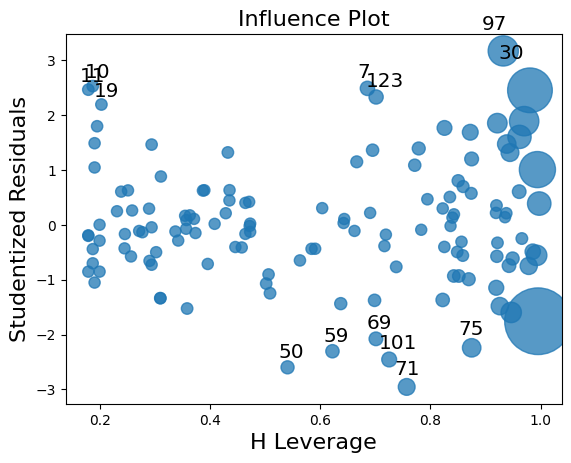

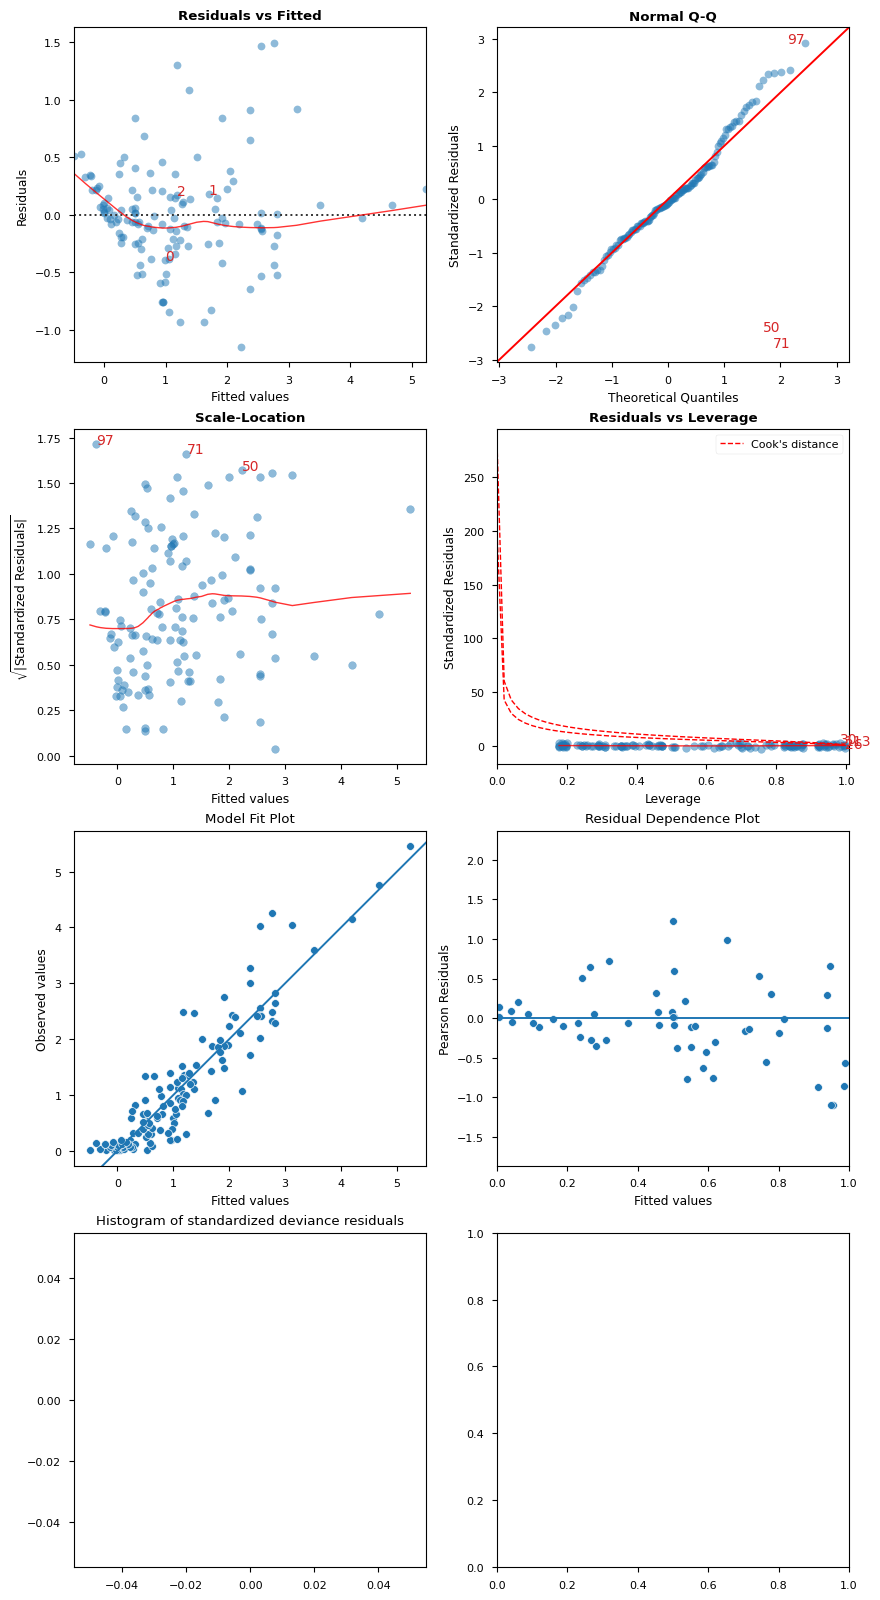

            Features  VIF Factor
78     Release:Route        9.59
76      Zeta:Release       10.17
42  Solubility:Route       14.31
50         Pgp:Route       15.62
75        Size:Route       16.42
..               ...         ...
2               logP     8274.95
37  Solubility:Comp1     8387.00
64       Comp1:Comp2    11608.44
3         Solubility    20036.46
0          Intercept   585553.22

[79 rows x 2 columns]
None


(<Figure size 1000x2000 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Model Fit Plot'}, xlabel='Fitted values', ylabel='Observed values'>,
         <AxesSubplot: title={'center': 'Residual Dependence Plot'}, xlabel='Fitted values', ylabel='Pearson Residuals'>],
        [<AxesSubplot: title={'center': 'Histogram of standardized deviance residuals'}>,
         <AxesSubplot: >]], dtype=object))

In [22]:
cls = LinearRegDiagnostic(inter_ols)
cls()

In [23]:
inter_ols.mse_resid

0.4726926729647689

In [24]:
inter_ols.predict(exog=pd.DataFrame(
    {'Weight':[252.268, 252.268, 252.268, 252.268], 'logP': [2.260, 2.260, 2.260, 2.260], 'Solubility': [0.071, 0.071, 0.071, 0.071], 'Pgp': [1, 1, 1, 1], 'DrugCarrierRatio': [0.480, 0.480, 0.480, 0.480], 'Position': [0, 0, 0, 0], 'Comp1': [1.239028, 1.239028, 1.239028, 1.239028], 'Comp2': [1.116500, 1.106221, 1.116500, 1.106221], 'Size': [170.630, 453.100, 170.630, 453.100], 'Zeta': [-37.700, 33.400, -37.700, 33.400], 'Release': [2.26, 2.95, 2.26, 2.95], 'Route': [1, 1, 0, 0]}))

0    1.170683
1    1.254124
2    0.373611
3   -0.342816
dtype: float64

In [25]:
data3 = X.copy()
data3['AUC'] = np.log(y)
log_inter_ols = sm.OLS.from_formula(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data3
).fit()
print(log_inter_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    AUC   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     7.291
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.13e-12
Time:                        03:15:28   Log-Likelihood:                -78.568
No. Observations:                 133   AIC:                             315.1
Df Residuals:                      54   BIC:                             543.5
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [26]:
true = np.log([1.03, 2.96, 0.365, 0.614])
true

array([ 0.0295588 ,  1.08518927, -1.00785793, -0.48776035])

In [27]:
pred = predict(inter_ols)
pred

0    1.170683
1    1.254124
2    0.373611
3   -0.342816
dtype: float64

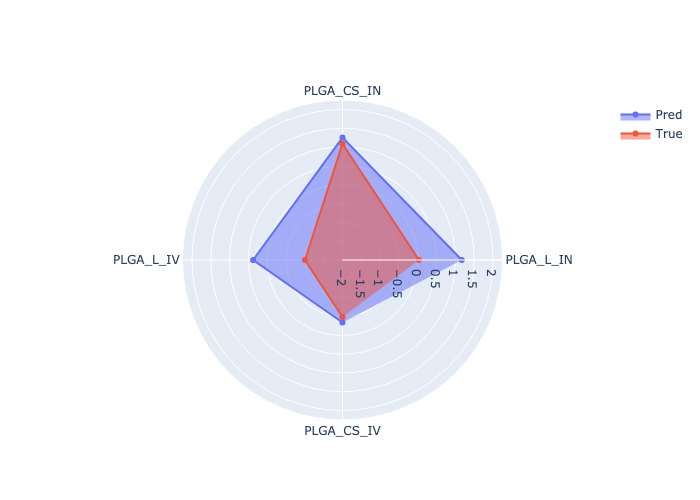

In [28]:
radar_graph(true, pred)


Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 91.94074250538787), ('p-value', 0.1338257494503106), ('f-value', 1.5502297692868239), ('f p-value', 0.04456302394703517)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', nan), ('p-value', nan)]

Linearity test (Harvey-Collier):
 Failed


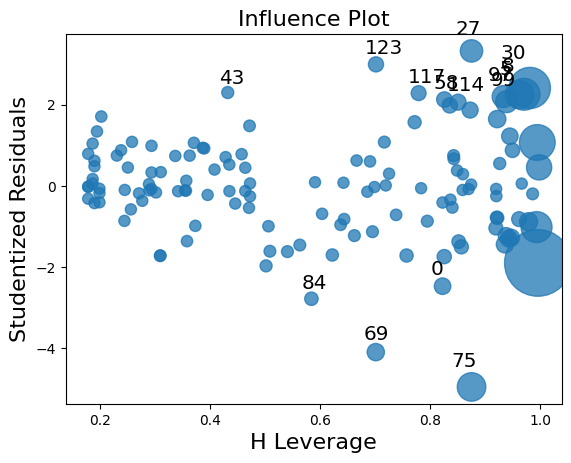

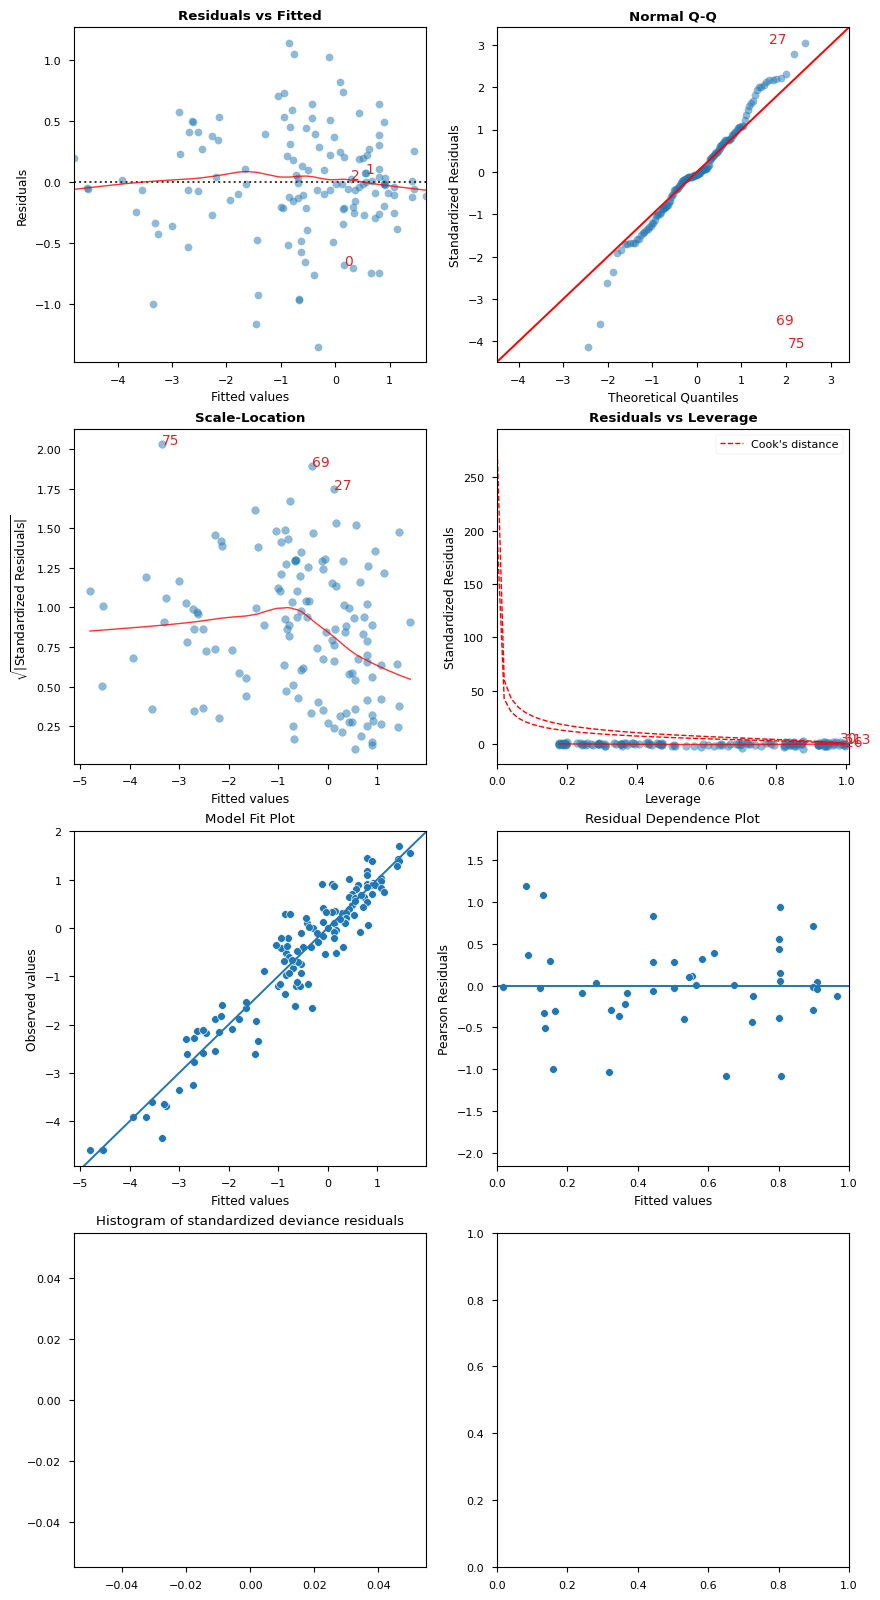

            Features  VIF Factor
78     Release:Route        9.59
76      Zeta:Release       10.17
42  Solubility:Route       14.31
50         Pgp:Route       15.62
75        Size:Route       16.42
..               ...         ...
2               logP     8274.95
37  Solubility:Comp1     8387.00
64       Comp1:Comp2    11608.44
3         Solubility    20036.46
0          Intercept   585553.22

[79 rows x 2 columns]
None


(<Figure size 1000x2000 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Model Fit Plot'}, xlabel='Fitted values', ylabel='Observed values'>,
         <AxesSubplot: title={'center': 'Residual Dependence Plot'}, xlabel='Fitted values', ylabel='Pearson Residuals'>],
        [<AxesSubplot: title={'center': 'Histogram of standardized deviance residuals'}>,
         <AxesSubplot: >]], dtype=object))

In [29]:
cls = LinearRegDiagnostic(log_inter_ols)
cls()

In [30]:
log_inter_ols.mse_resid

0.4699955819737607

In [31]:
data4 = data.copy()
data4['AUC'].apply(np.log)

raw_log_inter_ols = sm.OLS.from_formula(
    formula="AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data=data4
).fit()
print(raw_log_inter_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    AUC   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     2.509
Date:                Fri, 31 Mar 2023   Prob (F-statistic):             0.0321
Time:                        03:15:31   Log-Likelihood:                 6.4970
No. Observations:                 133   AIC:                             227.0
Df Residuals:                      13   BIC:                             573.8
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [32]:
true = np.log([1.03, 2.96, 0.365, 0.614])
true

array([ 0.0295588 ,  1.08518927, -1.00785793, -0.48776035])

In [34]:
pred = raw_log_inter_ols.predict(exog=pd.DataFrame(
        {'Weight': [252.268, 252.268, 252.268, 252.268], 'logP': [2.260, 2.260, 2.260, 2.260],
         'Solubility': [0.071, 0.071, 0.071, 0.071], 'Pgp': ['yes', 'yes', 'yes', 'yes'],
         'DrugCarrierRatio': [0.480, 0.480, 0.480, 0.480], 'Position': ['core', 'core', 'core', 'core'],
         'Comp1': ['PLGA', 'PLGA', 'PLGA', 'PLGA'], 'Comp2': ['phospholipids', 'chitosan', 'phospholipids', 'chitosan'],
         'Size': [170.630, 453.100, 170.630, 453.100], 'Zeta': [-37.700, 33.400, -37.700, 33.400],
         'Release': [2.26, 2.95, 2.26, 2.95], 'Route': ['IN', 'IN', 'IV', 'IV']}))
pred

0     1.041264
1    -5.236981
2     0.329000
3   -16.460407
dtype: float64

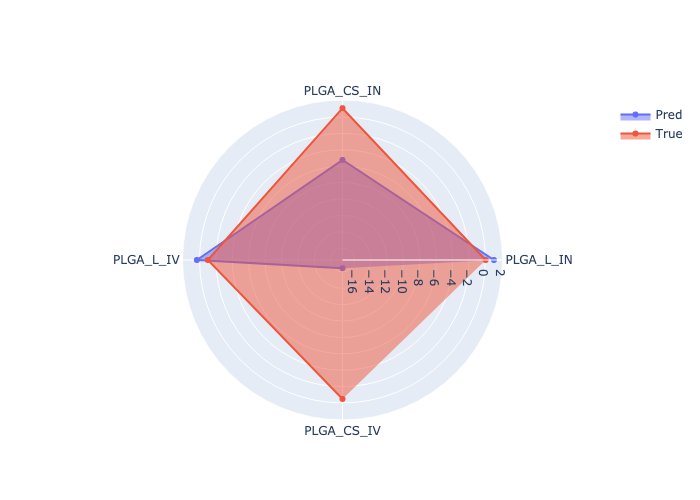

In [35]:
radar_graph(true, pred)

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning:

invalid value encountered in sqrt




Heteroscedasticity test 1 (Breusch-Pagan):
 [('Lagrange multiplier statistic', 72.77254676313542), ('p-value', 1.0), ('f-value', 0.13199864274688708), ('f p-value', 0.9999999998995815)]

Heteroscedasticity test 2 (Goldfeld-Quandt):
 [('F statistic', nan), ('p-value', nan)]

Linearity test (Harvey-Collier):
 Failed


/Users/introvertuoso/PycharmProjects/BrainTargeting/notebooks/helpers.py:408: RuntimeWarning:

invalid value encountered in sqrt



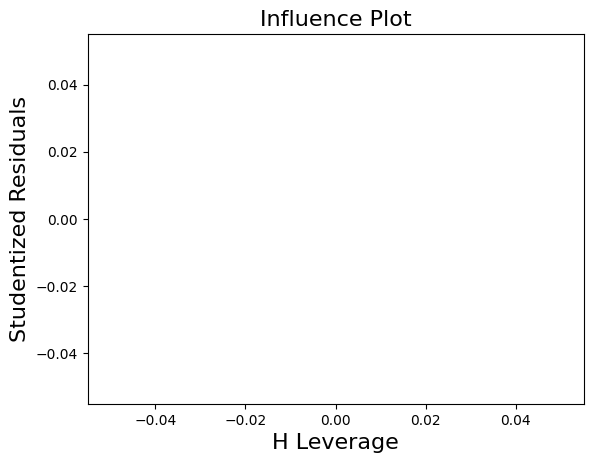

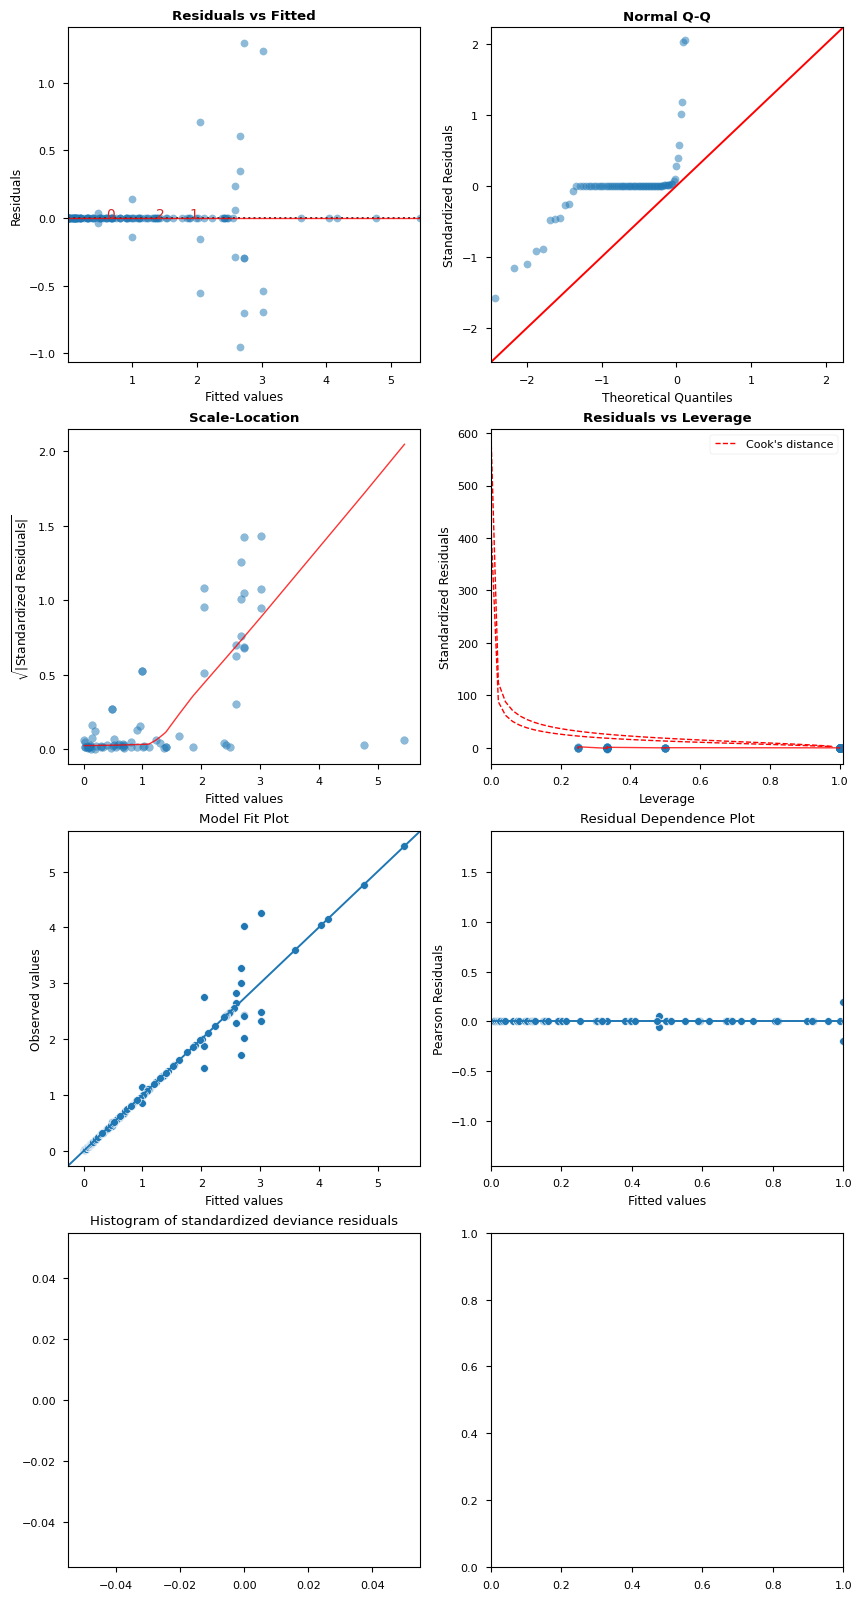

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning:

invalid value encountered in double_scalars



                                    Features    VIF Factor
0                                  Intercept  0.000000e+00
313                      Release:Route[T.IV]  9.007199e+15
235  DrugCarrierRatio:Comp1[T.phospholipids]           inf
236        DrugCarrierRatio:Comp1[T.protien]           inf
237    DrugCarrierRatio:Comp1[T.solid lipid]           inf
..                                       ...           ...
135        Comp1[T.Poloxamer]:Comp2[T.tween]           NaN
137         Comp1[T.chitosan]:Comp2[T.tween]           NaN
138            Comp1[T.other]:Comp2[T.tween]           NaN
140          Comp1[T.protien]:Comp2[T.tween]           NaN
149             Comp1[T.protien]:Route[T.IV]           NaN

[335 rows x 2 columns]
None


(<Figure size 1000x2000 with 8 Axes>,
 array([[<AxesSubplot: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>],
        [<AxesSubplot: title={'center': 'Model Fit Plot'}, xlabel='Fitted values', ylabel='Observed values'>,
         <AxesSubplot: title={'center': 'Residual Dependence Plot'}, xlabel='Fitted values', ylabel='Pearson Residuals'>],
        [<AxesSubplot: title={'center': 'Histogram of standardized deviance residuals'}>,
         <AxesSubplot: >]], dtype=object))

In [36]:
cls = LinearRegDiagnostic(raw_log_inter_ols)
cls()

In [37]:
raw_log_inter_ols.mse_resid

0.5432551666666665